<a href="https://colab.research.google.com/github/brendanpost71/MAC-Address/blob/main/APA_Correlation_Template_S24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **APA - Correlation Analysis**
# DATA 3300


## Name:Brendan Post

## Q1

First, load the required libraries then import the dataset. Produce a heading of the data and then consider which variables need to be removed prior to running a correlation analysis. Subset the dataframe to include only those variables that can be included, then generate histograms for each of those variables.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats #this library will be used to transform variables

In [ ]:
df = pd.read_excel('faculty_s24.xlsx')
df.head()

,facid,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,gender,tenure-track,courserate,gpa,lrnoutcome
0,1,6,6,5,5,2,2,4,2,2,2,2,female,y,4.654,2.865,5.5
1,2,4,5,3,3,4,4,3,4,2,3,2,female,n,3.598,2.399,5.5
2,3,4,4,2,3,3,3,3,2,1,2,2,female,y,3.355,2.269,3.0
3,4,4,4,4,4,2,2,2,2,2,3,3,male,n,4.234,2.863,4.2
4,5,6,7,4,5,3,3,3,2,2,1,2,male,y,4.875,3.650,5.3


facid should be dropped since it an identifier and does not contribute any useful data. Gender, tenure-track, and GPA should also be removed becuase they are categorical variables.

In [ ]:
df = df.drop(['facid', 'gender', 'tenure-track'], axis=1)
df.head()

,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,courserate,gpa,lrnoutcome
0,6,6,5,5,2,2,4,2,2,2,2,4.654,2.865,5.5
1,4,5,3,3,4,4,3,4,2,3,2,3.598,2.399,5.5
2,4,4,2,3,3,3,3,2,1,2,2,3.355,2.269,3.0
3,4,4,4,4,2,2,2,2,2,3,3,4.234,2.863,4.2
4,6,7,4,5,3,3,3,2,2,1,2,4.875,3.650,5.3


In [ ]:
df = df.drop(['gpa'], axis=1)
df.head()

,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,courserate,lrnoutcome
0,6,6,5,5,2,2,4,2,2,2,2,4.654,5.5
1,4,5,3,3,4,4,3,4,2,3,2,3.598,5.5
2,4,4,2,3,3,3,3,2,1,2,2,3.355,3.0
3,4,4,4,4,2,2,2,2,2,3,3,4.234,4.2
4,6,7,4,5,3,3,3,2,2,1,2,4.875,5.3


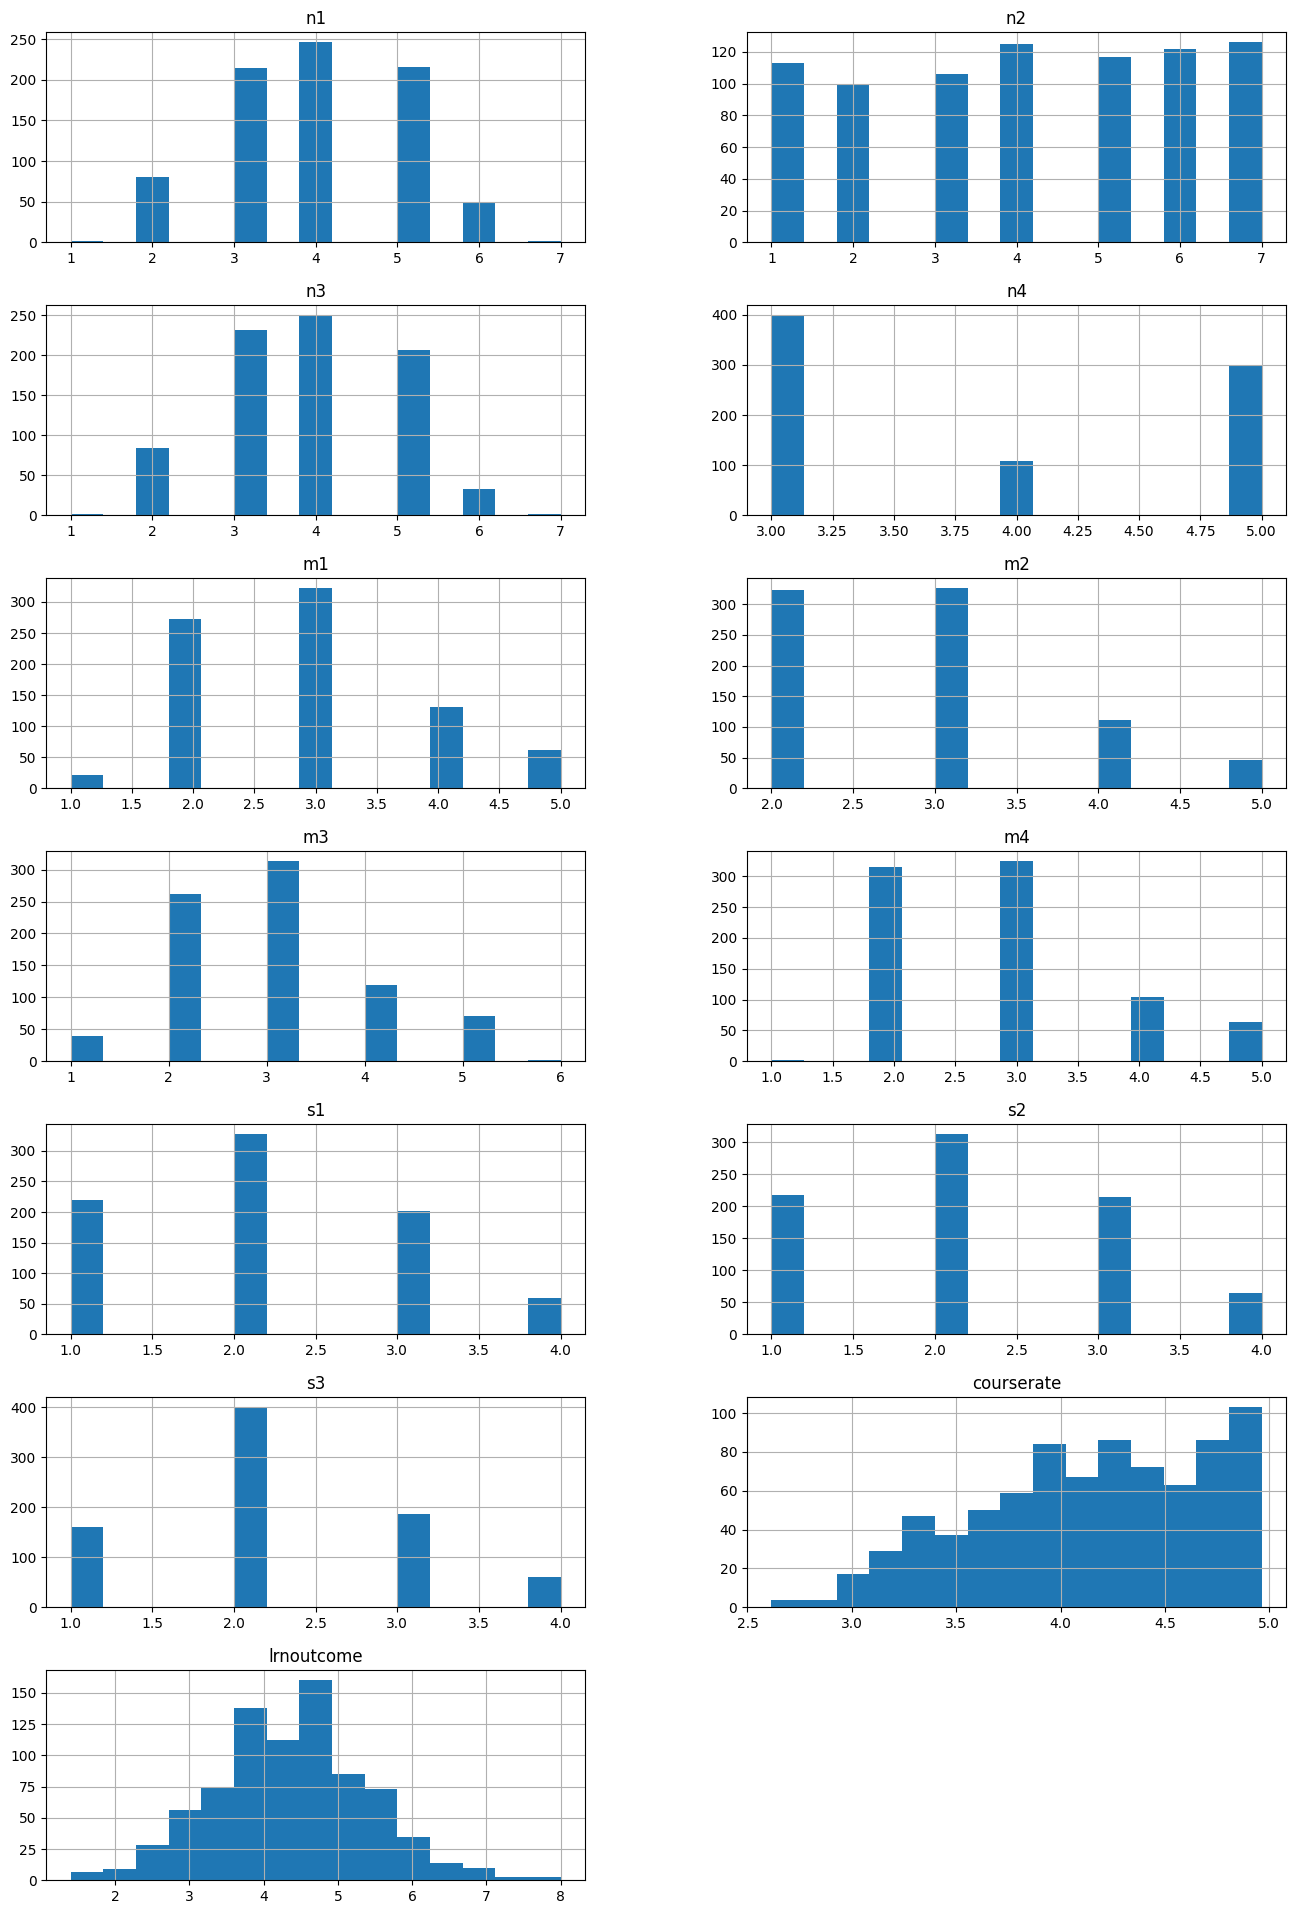

In [ ]:
df.hist(layout=(7, 2), figsize=(16, 24), bins=15)
plt.show()

List the variables that are not normally distributed: n4, m2, m3, m4, s1, s2, s3, courserate

How will you address these non-normally distributed vars?

# Q2

**Generate correlation matrix colormap table, making sure to include all necessary steps:**

## A

**Transform skewed variables using a Box-Cox transformation, including `n4`, `courserate`, `m2`, and `m4`.**

In [ ]:
# replace with code to create new transformed variables for n4, courserate, m2, and m4. Use the Box-Cox method.
#preview the headers
df['n4'] = np.log(df['n4'])
df['courserate'] = np.log(df['courserate'])
df['m2'] = np.log(df['m2'])
df['m4'] = np.log(df['m4'])

df.head()

,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,courserate,lrnoutcome
0,6,6,5,1.609438,2,0.693147,4,0.693147,2,2,2,1.537727,5.5
1,4,5,3,1.098612,4,1.386294,3,1.386294,2,3,2,1.280378,5.5
2,4,4,2,1.098612,3,1.098612,3,0.693147,1,2,2,1.210452,3.0
3,4,4,4,1.386294,2,0.693147,2,0.693147,2,3,3,1.443147,4.2
4,6,7,4,1.609438,3,1.098612,3,0.693147,2,1,2,1.584120,5.3


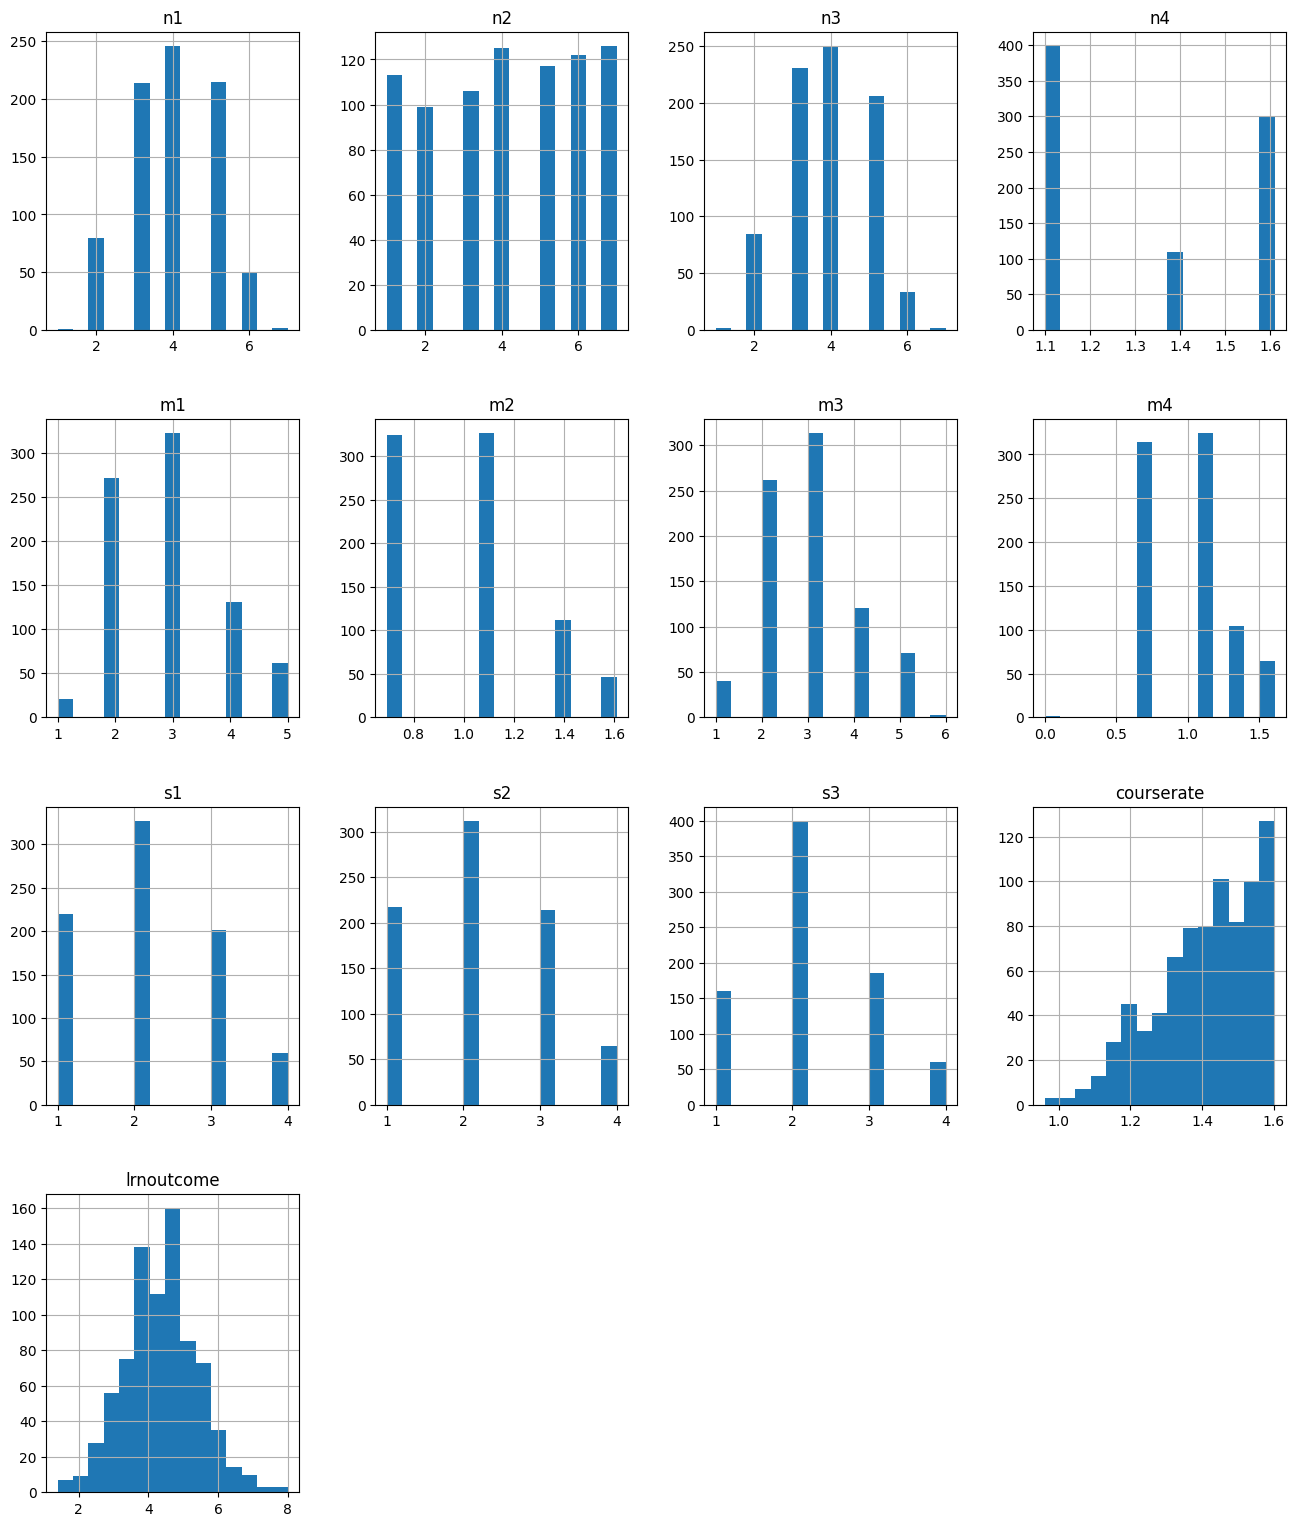

In [ ]:
df.hist(layout=(5,4), figsize=(16,24), bins=15)
plt.show()

**Are there any variables with distributions that cannot be made roughly normal? How could this impact the validity of the correlation analysis?** m4, m2, courserate, and n4 are still not normally distributed. A non-normal distribution may include outliers in the analysis thus creating an inaccurate correlation.

**Note: Not all variables will be normally distributed after transformation. For the scope of this assignment, discuss which are or are not normally distributed and which did or did not improve.**



## B

**Create a new data object subset (e.g., call it df_T) that contains your new transformed variables, and the original normally distributed variables.**

**Then, run the correlation matrix and display it in a color mapped table.**


In [ ]:
# Print the column names of the DataFrame
print(df.columns)

# Create a set of column names to drop
columns_to_drop = {'n4', 'courserate', 'm2', 'm4'}

# Find the missing columns in the DataFrame
missing_columns = columns_to_drop - set(df.columns)

# Print the missing columns
print(missing_columns)

Index(['n1', 'n2', 'n3', 'n4', 'm1', 'm2', 'm3', 'm4', 's1', 's2', 's3',
       'courserate', 'lrnoutcome'],
      dtype='object')
set()


In [ ]:
df_T = df.drop(columns=list(missing_columns))
df_T

,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,courserate,lrnoutcome
0,6,6,5,1.609438,2,0.693147,4,0.693147,2,2,2,1.537727,5.5
1,4,5,3,1.098612,4,1.386294,3,1.386294,2,3,2,1.280378,5.5
2,4,4,2,1.098612,3,1.098612,3,0.693147,1,2,2,1.210452,3.0
3,4,4,4,1.386294,2,0.693147,2,0.693147,2,3,3,1.443147,4.2
4,6,7,4,1.609438,3,1.098612,3,0.693147,2,1,2,1.584120,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,4,4,2,1.098612,3,1.098612,4,0.693147,2,1,2,1.341035,2.8
804,4,6,4,1.098612,3,0.693147,3,0.693147,1,1,3,1.259597,3.7
805,3,3,3,1.098612,3,0.693147,2,0.693147,1,1,2,1.422385,5.0
806,4,3,3,1.098612,3,1.098612,1,0.693147,3,2,3,1.038154,4.7


In [ ]:
cor_matrix = df_T.corr()
cor_matrix.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,courserate,lrnoutcome
n1,1.000000,-0.023274,0.593086,0.750337,-0.052312,-0.032960,-0.046698,-0.057508,0.142333,0.175569,0.164980,0.403305,-0.141134
n2,-0.023274,1.000000,-0.015562,-0.026699,-0.048688,0.014634,-0.029847,0.012777,-0.044801,0.010102,-0.015859,-0.025438,0.016932
n3,0.593086,-0.015562,1.000000,0.741883,-0.082005,-0.082679,-0.133956,-0.058824,0.117596,0.190751,0.145797,0.437356,-0.188219
n4,0.750337,-0.026699,0.741883,1.000000,-0.091518,-0.088193,-0.080854,-0.081448,0.200107,0.253393,0.218110,0.453262,-0.211149
m1,-0.052312,-0.048688,-0.082005,-0.091518,1.000000,0.502829,0.482770,0.535450,0.013620,-0.035312,0.010487,-0.103036,0.090698
m2,-0.032960,0.014634,-0.082679,-0.088193,0.502829,1.000000,0.525487,0.565623,0.013672,0.003939,0.017785,-0.023756,0.066138
m3,-0.046698,-0.029847,-0.133956,-0.080854,0.482770,0.525487,1.000000,0.513026,0.005768,-0.051190,-0.010966,-0.047341,0.055793
m4,-0.057508,0.012777,-0.058824,-0.081448,0.535450,0.565623,0.513026,1.000000,-0.031319,0.000884,0.023849,-0.072395,0.065268
s1,0.142333,-0.044801,0.117596,0.200107,0.013620,0.013672,0.005768,-0.031319,1.000000,0.386782,0.412702,-0.104010,-0.046934
s2,0.175569,0.010102,0.190751,0.253393,-0.035312,0.003939,-0.051190,0.000884,0.386782,1.000000,0.425613,-0.089639,-0.108051


## C

**Based on your correlation analysis, what are the *three strongest positive* correlations? Next identify the *three strongest negative* correlations in the dataset. Provide both the item pairs as well as their correlation coefficient.**



**3 strongest positive**
* n1,n4
* n1, n3
* m2, m4

**3 strongest negative**
* lrnoutcome, n4
* lrnoutcome, n3
* lrnoutcome, n1

## D
**What is the *third* highest $R^2$ value for any variable pair in the analysis?
What does this $R^2$ value tell us about the relationship between the two variables?**



In [ ]:
r = 0.565623 ** 2
print(r)

0.31992937812899996


m2 explains about 32% of m4.

## E
**What is convergent validity and when does it matter?**


Covergent validity means that two different measures will produce similar results. It is used to ensure the methods we are using are accurate.

## F

**Assuming that an $r$ of 0.3 is required to demonstrate convergent validity, do the multiple items that make up each of the Narcissism (the *n* variables), Machiavellianism (the *m* variables), and Sociopathy (the *s* variables) measurements demonstrate convergent validity? Identify any attributes that do not converge adequately and report their $r$ values.**




# Q3

## A
Create three new aggregate variables by averaging the coverging *m* variables to represent Machiavellianism, converging *n* variables to represent Narcissim, and the converging *s* variables to represent Sociopathy.

Next replace *df_T* with a new subset containing only those variables you want to run in the new correlation analysis *(hint: do we need s1-s3 if we include Sociopathy?)*

**Then run a new correlation matrix and display it in a colormap table.**


In [ ]:
df_T

,n1,n2,n3,n4,m1,m2,m3,m4,s1,s2,s3,courserate,lrnoutcome
0,6,6,5,1.609438,2,0.693147,4,0.693147,2,2,2,1.537727,5.5
1,4,5,3,1.098612,4,1.386294,3,1.386294,2,3,2,1.280378,5.5
2,4,4,2,1.098612,3,1.098612,3,0.693147,1,2,2,1.210452,3.0
3,4,4,4,1.386294,2,0.693147,2,0.693147,2,3,3,1.443147,4.2
4,6,7,4,1.609438,3,1.098612,3,0.693147,2,1,2,1.584120,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,4,4,2,1.098612,3,1.098612,4,0.693147,2,1,2,1.341035,2.8
804,4,6,4,1.098612,3,0.693147,3,0.693147,1,1,3,1.259597,3.7
805,3,3,3,1.098612,3,0.693147,2,0.693147,1,1,2,1.422385,5.0
806,4,3,3,1.098612,3,1.098612,1,0.693147,3,2,3,1.038154,4.7


In [ ]:
df_T['Mach'] = df[['m1','m2','m3','m4']].mean(axis=1) #create Machiavellianism aggregate
df_T['Nar'] = df[['n1','n3','n4']].mean(axis=1) #create Narcicissm aggregate
df_T['Socio'] = df[['s1','s2','s3']].mean(axis=1) #create Sociopathy aggregate
df_T = df_T[['lrnoutcome', 'courserate', 'Mach', 'Nar', 'Socio']] #subset to only include necessary variables in correlation matrix
df_T

<ipython-input-24-88390744d697>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T['Mach'] = df[['m1','m2','m3','m4']].mean(axis=1) #create Machiavellianism aggregate
<ipython-input-24-88390744d697>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_T['Nar'] = df[['n1','n3','n4']].mean(axis=1) #create Narcicissm aggregate
<ipython-input-24-88390744d697>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,lrnoutcome,courserate,Mach,Nar,Socio
0,5.5,1.537727,1.846574,4.203146,2.000000
1,5.5,1.280378,2.443147,2.699537,2.333333
2,3.0,1.210452,1.947940,2.366204,1.666667
3,4.2,1.443147,1.346574,3.128765,2.666667
4,5.3,1.584120,1.947940,3.869813,1.666667
...,...,...,...,...,...
803,2.8,1.341035,2.197940,2.366204,1.666667
804,3.7,1.259597,1.846574,3.032871,1.666667
805,5.0,1.422385,1.596574,2.366204,1.333333
806,4.7,1.038154,1.447940,2.699537,2.666667


In [ ]:
cor_matrix = df_T.corr()
cor_matrix.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

,lrnoutcome,courserate,Mach,Nar,Socio
lrnoutcome,1.000000,0.086970,0.087128,-0.190148,-0.118348
courserate,0.086970,1.000000,-0.083792,0.476442,-0.118357
Mach,0.087128,-0.083792,1.000000,-0.103606,-0.012943
Nar,-0.190148,0.476442,-0.103606,1.000000,0.235853
Socio,-0.118348,-0.118357,-0.012943,0.235853,1.000000


## B

**What are the *four* strongest correlations in the matrix? For each, give the item pair as well as the correlation coefficient.**



* Nar, courserate 0.476442
* Nar, Socio 0.235853
* Mach, lrnoutcome 0.087128
* courserate, lrncoutcome 0.086970




## C

**What hypotheses might you come up with based on the correlation coefficients found in your analysis? List three, include the relevant correlation coefficient(s), and suggest why the relationship(s) noted may exist (e.g., if you were to find a strong correlation between daytime temperature and lemonade sales, you might suggest that when the weather is hot, people may become more thirsty and therefore more interested in purchasing potentially refreshing drinks).**


* Those with narcissitic tendencies may believe what students say about the course is a direct reflection about them as a person, thus leading to a high correlation.
* Those with socipathic tendencies may also be inclined to do whatever it takes to feed their own ego, thus creating the correlation between narcism and sociopathy.
* Those who are manipulative may be inclined to "manipulate" their students into doing well in the course, thus creating correlation between Machivellianism and learning outcome.

# Q4

**Assume that we will want to use the *Learning Outcome variable as a dependent variable in a future analysis*. Using the correlation matrix from Part 3...**

## A
**Which independent variable (IV, any variable other than Learning Outcome) has the least influence on Learning Outcome? Indicate both the variable and the coefficient or $r$-value.**



Narcissism -0.190148

## B

**Based on a multicollinearity threshold of $r = 0.57$, which IV pair would you want to check for multicollinearity? Indicate both the pair and the coefficient value.**

**Does it make sense that these two variables might be collinear?**


Narcissism and Course Rating (0.476442). Yes it makes sense these two might be collinear because how well a student likes a course may affect how much someone believes about themself.

**Create a visualization to illustrate evidence of this correlation.**

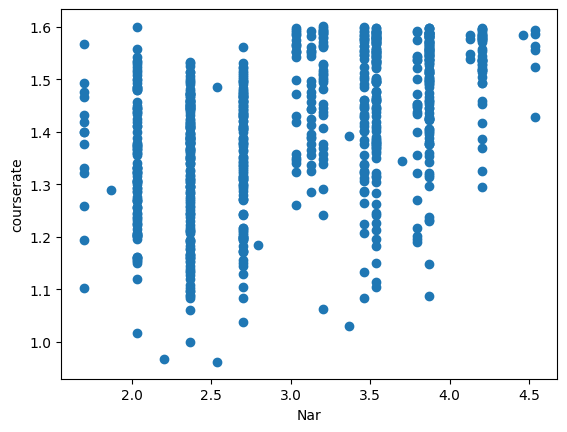

In [ ]:
plt.scatter(df_T['Nar'], df_T['courserate']) # replace 'Col_1' and 'Col_2' with the two variables you want to plot
plt.xlabel('Nar')
plt.ylabel('courserate')
plt.show()